In [5]:
%pylab inline
from scipy.integrate import odeint


Populating the interactive namespace from numpy and matplotlib


# Homework 2: First Part



## (1) Ideal Control 

<p>Here we found the ideal controller in which a force either in x and why are feasible all the time, the expected behaviour is to have a peferct line from initial point to desired position.</p>

We define gravity force as $g=9.8$, vector state $\mathbf{x}=[x, y,v_x, v_y]$, initial state $\mathbf{x}=[0, 0, 0, 0]$, desired final state as $\mathbf{x}^d= \left [ \frac{\sqrt(2)}{2}, \frac{\sqrt(2)}{2}, 0, 0\right]$, mass as $m=1$.

Dynamic of the system is defined as 
$\mathbf{\dot{x}}=\begin{bmatrix}
\dot{x}\\ 
\dot{y}\\ 
\ddot{x}\\
\ddot{y}
\end{bmatrix}=\begin{bmatrix}
v_x\\
v_y\\
u_x \\
u_y-mg
\end{bmatrix}$ where $u_x$ and $u_y$ are the designed control parameters. By defining error dynamic such as 
$e_x=x^d-x$ and $e_y=y^d-y$ and its derivatives $\dot{e}_x=\dot{x}^d-\dot{x}$ and $\dot{e}_y=\dot{y}^d-\dot{y}$ the control in each axis is then

$u_x=kp*e_x+k_d*\dot{e}_x$

$u_x=kp*e_y+k_d*\dot{e}_y+mg$


In [6]:
import math as mt
def control(x, ref):
    ex = ref[0] - x[0]
    exd = ref[2] - x[2] 
    ey = ref[1] - x[1]
    eyd = ref[3] - x[3] 
    u[0] = kp*ex + kd*exd
    u[1] = kp*ey + kd*eyd +m*g
    angle = mt.atan2(u[1],u[0])*180/pi
    return u

def physics(dt, x, ref):
    if x[1] >= 0:
        u = control(x, ref)
        aux = pi*65/180
        a[0] = u[0]
        a[1] = u[1]
        dx = array([x[2], x[3], a[0], a[1]-m*g])
    elif x[1] < 0:
        dx = array([x[2], x[3], 0, 0])

    x += dx * dt
    
    return [x]

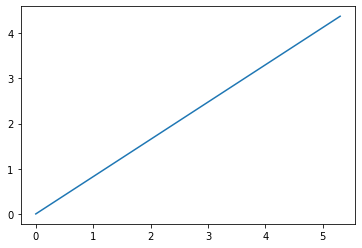

In [7]:
tf = 5.
dt = 0.0001    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval

g = 9.8
m = 1.
kp = 3.
kd = 6.


x = array([0., 0., 0., 0.])
ref = array ([5+(sqrt(2)/2), 4+(sqrt(2)/2), 0., 0.])
a = array([0., 0.])
u = array([0., 0.])
x_log = [copy(x)]

for t in time:
    [x] = physics(dt, x, ref)
    x_log.append(copy(x))


x_log = array(x_log)
# print('x:{} y:{}'.format(ref[0],ref[1]))
plot(x_log[:,0], x_log[:,1])


As expected the control drives the particle to the desired final position in a straigth line. However, this is not our case since the force is fixed at $\theta=60$

## (2) Angle fixed

As explained in the previous simulation the angle of the force is fixed so the amount of force applied to each axis might not vary in components just its magnitude, then is neccesary to consider $a_x= \|F\|\cos(60)$, and $a_y=\|F\| \sin(60)$. However, this do not satisfy the requirements of the problem since it requires the force to be applied over the entire trajectory.

In [8]:
import math as mt
def control2(x, ref):
    ex = ref[0] - x[0]
    exd = ref[2] - x[2] 
    ey = ref[1] - x[1]
    eyd = ref[3] - x[3] 
    u[0] = kp*ex + kd*exd
    u[1] = kp*ey + kd*eyd +m*g
    angle = mt.atan2(u[1],u[0])*180/pi
    return u

def physics2(dt, x, ref):
    if x[1] >= 0:
        u = control2(x, ref)
        aux = pi*60/180
        a[0] = u[0] * cos(aux)
        a[1] = u[1] * sin(aux)
        dx = array([x[2], x[3], a[0], a[1]-m*g])
    elif x[1] < 0:
        dx = array([x[2], x[3], 0, 0])

    x += dx * dt
    
    return [x]

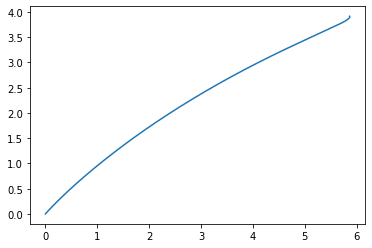

In [9]:
tf = 5.
dt = 0.0001    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval

g = 9.8
m = 1.
kp = 2.
kd = 3.


x = array([0., 0., 0., 0.])
ref = array ([5+(sqrt(2)/2), 4+(sqrt(2)/2), 0., 0.])
a = array([0., 0.])
u = array([0., 0.])
x_log = [copy(x)]

for t in time:
    [x] = physics2(dt, x, ref)
    x_log.append(copy(x))


x_log = array(x_log)
# print('x:{} y:{}'.format(ref[0],ref[1]))
plot(x_log[:,0], x_log[:,1])


## (3) Ramp

So, now we use the consevation energy principle to find the velocity we need to reach at the end of the ramp to reach the desired height as

$\frac{1}{2}mv_y^2=mgy^d$

Then the velocity we need is $v^d_y=\sqrt{2mgy^d}$ as the angle of the ramp is $\alpha=45$, the velocity in $v_x$ must be the same.

Maximum normal force for the system to stay at the ramp the should be $N_{max}= \frac{mg\cos(45)}{\sin(45)}$ then, $v_{x_{max}}=N_{max}\cos(45)$. Then, final desired stated should be $\mathbf{x}^d = \left[ \sqrt{2}/2, \sqrt{2}/2, v_x^d, v_y^d \right]$. Dynamic is then

$
\begin{matrix}
m\ddot{x}&=&\|F\|\cos(60)-N_x\\
m\ddot{y}&=&\|F\|\sin(60)+N_y-mg
\end{matrix}
$

where $\|N\|=g*\cos(45) - \|F\|\sin(15)$ which is the required to keep on the ramp, the angle is normal to the surface which is $n_{angle}=135$. Therefore, $N_x=\|N\|\cos(135)$ and $N_y=\|N\|\sin(135)$

In [10]:
def control3(x, ref, h):
    ref[2] = sqrt(2*g*h)
    ref[3] = sqrt(2*g*h)
    ex = ref[0] - x[0]
    exd = ref[2] - x[2] 
    ey = ref[1] - x[1]
    eyd = ref[3] - x[3] 
    u[0] = kp*ex + kd*exd
    u[1] = kp*ey + kd*eyd  
    return u

def physics3(dt, x, ref, h):
    
    u = control3(x, ref, h)
    ramp_angle = 45 *pi/180
    force_angle = 60 *pi/180
    F = norm(u)
    #F = u.dot([cos(force_angle), sin(force_angle)])
    N = g*cos(ramp_angle) - F* sin(15*pi/180)
    normal_vector = array([cos(135*pi/180), sin(135*pi/180)])
    
    if x[0] <= ref[0]:
        aux = pi*65/180
        a[0] = u[0]
        a[1] = u[1]
        dx = array([x[2], x[3], F*cos(force_angle) + N * normal_vector[1],
                        F*sin(force_angle) + N * normal_vector[1]-g])
    elif x[0] > ref[0]:
        if x[1] > 0.:
            dx = array([x[2], x[3], 0, -g])
        elif x[1] <= 0.:
            dx = array([x[2], 0, 0, 0])

    x += dx * dt
    
    return [x]

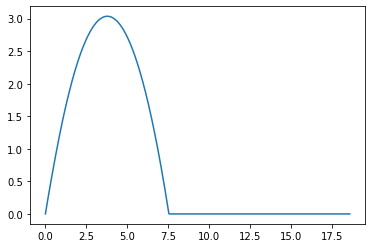

In [11]:
tf = 4.
dt = 0.0001    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval

g = 9.8
m = 1.
kp = 1.
kd = 6.8


x = array([0., 0., 0., 0.])
ref = array ([sqrt(2)/2, sqrt(2)/2, 0., 0.])
a = array([0., 0.])
u = array([0., 0.])
x_log = [copy(x)]
h = 3.



for t in time:
    [x] = physics3(dt, x, ref, h)
    x_log.append(copy(x))


x_log = array(x_log)
# print('x:{} y:{}'.format(ref[0],ref[1]))
plot(x_log[:,0], x_log[:,1])


# Homework 2: Second Part

In [12]:
def control4(x, ref):
    e_theta = ref[0] - x[0]
    e_omega = ref[1] - x[1] 
    u = kp*e_theta + kd*e_omega
    return u

def physics4(dt, x, ref):
    u = control4(x, ref)
    dx = array([x[1], u])
    x += dx * dt
    return [x]



4001 4002


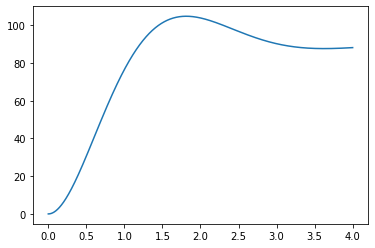

In [16]:
tf = 4.
dt = 0.001    # Time step
time = linspace(0.,tf, int(tf / dt) + 1)  # Time interval


r = 1.
kp = 4.
kd = 2.


x = array([0., 0.]) #[theta, omega]
ref = array ([90, 0.])
a = array([0., 0.])
u = array([0., 0.])
x_log = [copy(x)]


for t in time:
    [x] = physics4(dt, x, ref)
    x_log.append(copy(x))
    
x_log = array(x_log)
print(len(time), len(x_log[:,0]))
# print('x:{} y:{}'.format(ref[0],ref[1]))
plot(time, x_log[:-1,0])

In [17]:
# import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation import IPython_display    
# from IPython.display import HTML
    


# fig, ax = plt.subplots()
# x_log = array(x_log)

# def animate(t):
#     ax.clear()
    
#     # Path
# #     plot(x_log[:,0], x_log[:,1])

#     plot(x_log[:,0], x_log[:,1], 'r--')
    
#     # Initial conditions
#     plot(x_log[t,0], x_log[t,1], 'bo')
# #     plt.quiver()
    
    
# print(len(time))

# anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=30)

# HTML(anim.to_jshtml())